# TECH2 Mandatory assignment 2

## About the mandatory assignment

-   The assignment must be completed individually.
-   You are allowed to use all online resources for help, including generative AI. You must include a statement on how you used AI to solve the tasks.
-   After the assignment deadline, you must perform a peer review of two other students' assignment on Canvas. You're not allowed to use AI to write the peer-review for you.
-   Deadline for the assignment: Friday, October 17, 16:00.
-   Deadline for the peer review: Friday, October 24, 16:00.


## Requirements

-   Your solution needs to be uploaded to GitHub. You should fork the assignment repository at
    [https://github.com/richardfoltyn/TECH2-H25-assignment2](https://github.com/richardfoltyn/TECH2-H25-assignment2)
    and add your solution to this notebook.
-   All commits in your repository must be *prior* to the deadline. 
-   You need to make sure that your GitHub repository is publicly accessible. This can be changed in the GitHub repository setttings, if required.
-   You need to submit the URL to the your GitHub repository on Canvas.
-   Make sure your notebook runs without errors (`Restart` and `Run all`). 
-   Your notebook *must* run with the TECH2 environment we've been using in part 2. You can create this environment from the 
    `environment.yml` file in this repository if you haven't done so earlier.


## Tasks

In this assignment, you are asked to analyze a 10% sub-sample of the Survey of Consumer Finances (SCF), a survey of household portfolios that is representative of the US population. The survey was administered every 3 years from 1989 to 2022. The appendix in this document contains a description of the variables present in this data set (this is a subset; the original SCF contains many more variables).

1.  Data preprocessing

    1.  Read the CSV file `SCF_10pct.csv` stored in this repository.
    2.  Keep only observations where the household head is aged between 25 and 89. 
    3.  Create the column `'college'`, which contains an indicator variable that is 1 when the household head has at least some college (column `'educ'` is 3 or 4), and 0 otherwise.
    4.  Divide the values in the column `'networth'` by 1,000 so that they are reported in thousands of US dollars.
    5.  Report the number of observations in the final sample.

2.  In this part, you're asked to analyze how net worth (total gross assets minus total debt) varies across the four education levels (no high school, high school, some college, 4-year college or more):

    1.  Compute the average net worth (in thousands of US dollars) by education (use a loop).
    2.  Create a bar chart that plots the average net worth by education.

3.  In this part, you're asked to analyze how net worth has changed over the last 3 decades:

    1.  Compute the average net worth (in thousands of US dollars) by survey year (use a loop).
    2.  Create a line plot that shows the evolution of average net worth over the years 1989 to 2022.

4.  Finally, combine the analyses from the previous parts to see how net worth evolved over the years for those with and without college.

    1.  Compute the average net worth (in thousands of US dollars) by survey year, separately for non-college (`college=0`) and the college-educated (`college=1`).
    2.  Create a line plot that shows the evolution of net worth over the years 1989 to 2022 by college status, i.e., your figure should contain two lines, one for college and one for non-college.

Remember to add axis labels, titles, and legends (where applicable) to all your figures.


## Hints

-   The assignment can be solved using the concepts we covered up to and including lecture/workshop 3 on Friday, October 10. 
-   In particular, you don't need `groupby()` which we'll cover later in the course, but you can instead loop over education levels or years, as needed.

***
**WRITE YOUR SOLUTION TO PARTS 1-4 HERE**

## Preface

__This is my solution for TECH2 Mandatory assignment #2.__

I wanted to solve it on my own without the help of AI, so I have not used AI except in part 2.1.

In part 2.1, I was able to compute the average networth on my own with query(), but had some issues computing it with a loop. I used ChatGPT, which helped me figure out that I need to write range(len(df1)) in the for-statement and iloc[i] in the if/elif-statements to make the loop work.

## Part 1
#### __1.1__

In [1]:
# Import pandas
import pandas as pd

# Read csv file
df1 = pd.read_csv('SCF_10pct.csv')

# Display first 5 rows
df1.head(5)

,id,year,age,educ,networth
0,1,1989,35,2,0.0
1,2,1989,35,2,0.0
2,3,1989,51,2,16899.9
3,4,1989,33,2,25845.6
4,5,1989,33,2,25845.6


#### __1.2__

In [2]:
# Only include observations with age between 25 and 89 in dataframe
# Use copy() to avoid getting long message when I run the code
df1 = df1.query('25 <= age <= 89').copy()

# Display data frame
df1

,id,year,age,educ,networth
0,1,1989,35,2,0.0
1,2,1989,35,2,0.0
2,3,1989,51,2,16899.9
3,4,1989,33,2,25845.6
4,5,1989,33,2,25845.6
...,...,...,...,...,...
5803,5804,2022,57,2,129101.0
5804,5805,2022,80,4,747400.0
5805,5806,2022,67,4,7354760.0
5806,5807,2022,70,4,3229000.0


#### __1.3__

In [3]:
# Create a new column where education level 3 or 4 equals True, and False otherwise
# Use astype(int) to make the boolean values into integers
df1['college'] = df1['educ'].isin([3, 4]).astype(int)

# Display first 5 rows
df1.head(5)

,id,year,age,educ,networth,college
0,1,1989,35,2,0.0,0
1,2,1989,35,2,0.0,0
2,3,1989,51,2,16899.9,0
3,4,1989,33,2,25845.6,0
4,5,1989,33,2,25845.6,0


#### __1.4__

In [4]:
# Divide networth by 1000
df1['networth'] = df1['networth']/1000

# Display first 5 rows
df1.head(5)

,id,year,age,educ,networth,college
0,1,1989,35,2,0.0000,0
1,2,1989,35,2,0.0000,0
2,3,1989,51,2,16.8999,0
3,4,1989,33,2,25.8456,0
4,5,1989,33,2,25.8456,0


#### __1.5__

In [5]:
# info() shows the number of entries in the data frame
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5471 entries, 0 to 5807
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        5471 non-null   int64  
 1   year      5471 non-null   int64  
 2   age       5471 non-null   int64  
 3   educ      5471 non-null   int64  
 4   networth  5471 non-null   float64
 5   college   5471 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 299.2 KB


The number of observations in the final sample is 5471.

## Part 2

#### __2.1__

In [6]:
""" 
METHOD 1
Compute average networth with query()
"""


# Select rows with education level 1
df1_educ1 = df1.query('educ == 1')
# Sum all networth observations and divide by number of observations to find average
avg1 = df1_educ1['networth'].sum() / len(df1_educ1)


# Do the same for education level 2, 3 and 4
df1_educ2 = df1.query('educ == 2')
avg2 = df1_educ2['networth'].sum() / len(df1_educ2)

df1_educ3 = df1.query('educ == 3')
avg3 = df1_educ3['networth'].sum() / len(df1_educ3)

df1_educ4 = df1.query('educ == 4')
avg4 = df1_educ4['networth'].sum() / len(df1_educ4)



In [7]:
"""
METHOD 2
Compute average networth using a loop
Help from ChatGPT in the for-statement and if/elif-statements.
"""

# Create empty variables to store the networth sum of each education level
sum1 = 0
sum2 = 0
sum3 = 0
sum4 = 0

# Create for-loop that runs as many times as there are observations
# Help from ChatGPT to write range(len(df1))
for i in range(len(df1)):

    # Check if education level in row i is equal to 1
    # Help from ChatGPT to write iloc[i]
    if df1['educ'].iloc[i] == 1:

        # Add the networth in that row to the sum1 variable
        sum1 = sum1 + df1['networth'].iloc[i]

    # Do the same for education level 2, 3 and 4
    elif df1['educ'].iloc[i] == 2:
        sum2 = sum2 + df1['networth'].iloc[i]

    elif df1['educ'].iloc[i] == 3:
        sum3 = sum3 + df1['networth'].iloc[i]
    
    elif df1['educ'].iloc[i] == 4:
        sum4 = sum4 + df1['networth'].iloc[i]

    else:
        pass


# Divide each sum variable by the number of observations within that education level
# Store the average networths in variables
avg1 = sum1 / len(df1.query('educ == 1'))
avg2 = sum2 / len(df1.query('educ == 2'))
avg3 = sum3 / len(df1.query('educ == 3'))
avg4 = sum4 / len(df1.query('educ == 4'))

In [8]:
# Print answers
print(f'The average networth for education level 1 (no high school) is {avg1:.2f} thousand U.S. dollars.')
print(f'The average networth for education level 2 (high school) is {avg2:.2f} thousand U.S. dollars.')
print(f'The average networth for education level 3 (some college) is {avg3:.2f} thousand U.S. dollars.')
print(f'The average networth for education level 4 (4-year college or more) is {avg4:.2f} thousand U.S. dollars.')

The average networth for education level 1 (no high school) is 154.41 thousand U.S. dollars.
The average networth for education level 2 (high school) is 279.35 thousand U.S. dollars.
The average networth for education level 3 (some college) is 1107.28 thousand U.S. dollars.
The average networth for education level 4 (4-year college or more) is 1677.32 thousand U.S. dollars.


#### __2.2__

Text(0, 0.5, 'Average networth (thousand U.S. dollars)')

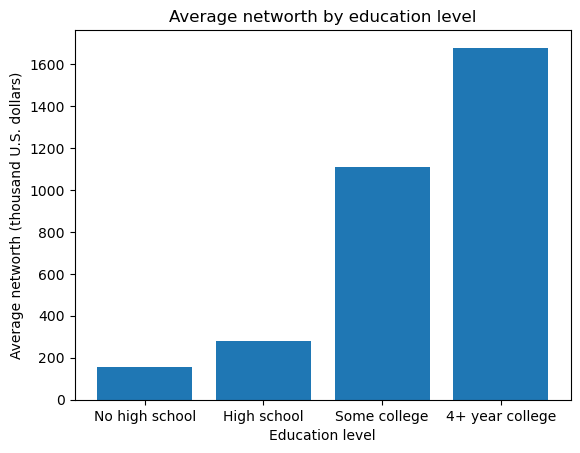

In [9]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create list of education levels 1-4
education_level = ['No high school', 'High school', 'Some college', '4+ year college']

# Create list of average networth for education levels 1-4
avg_networth = [avg1, avg2, avg3, avg4]

# Plot bar chart of average networth by education level
plt.bar(education_level, avg_networth)

# Add title
plt.title('Average networth by education level')

# Label x-axis
plt.xlabel('Education level')

# Label y-axis
plt.ylabel('Average networth (thousand U.S. dollars)')


## Part 3

#### __3.1__

In [10]:
# Create empty list to store average networths by survey year
avg_nw_year = []

# Create empty list for survey years
year = []

# Use for-loop that runs for each survey year
for i in range(1989, 2023, 3):

    # Select observations with year equal to i
    selectyear = df1.query(f'year == {i}')

    # Sum networths from that year and divide by number of observations to find average
    avg_nw = selectyear['networth'].sum() / len(selectyear)

    # Add survey year to the list
    year.append(i)

    # Add average networth to the list
    avg_nw_year.append(avg_nw)

#### __3.2__

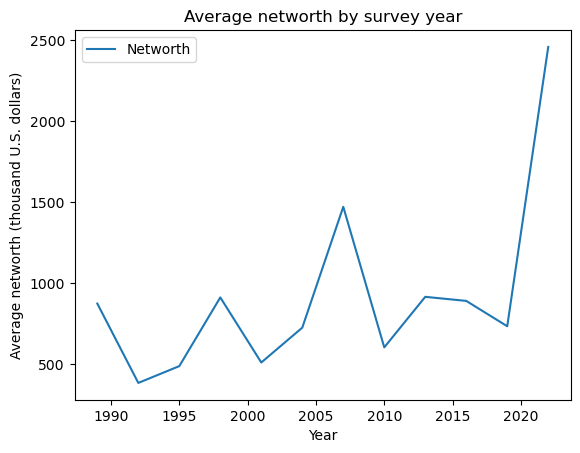

In [11]:
# Plot average networth by survey year
plt.plot(year, avg_nw_year, label = 'Networth')

# Label x-axis
plt.xlabel('Year')

# Label y-axis
plt.ylabel('Average networth (thousand U.S. dollars)')

# Add title
plt.title('Average networth by survey year')

# Add legend
plt.legend()

## Part 4

#### __4.1__

In [12]:
# Create empty lists for average networth by college education and survey year
avg_nw_year_c = []
avg_nw_year_nc = []

# Use for-loop that runs through each survey year
for y in year:

    # Set sum variables for networth to 0
    sum_c = 0
    sum_nc = 0

    # Set count variables to 0
    count_c = 0
    count_nc = 0

    # Use for-loop that runs for each observation
    for i in range(len(df1)):

        # Check if the year in current row is equal to the current y
        if df1['year'].iloc[i] == y:

            # Check if college column of that row is equal to one
            if df1['college'].iloc[i] == 1:

                # Add networth in that row to the sum_c variable
                sum_c = sum_c + df1['networth'].iloc[i]

                # Count number of college-educated observations that survey year
                count_c = count_c + 1

            else:
                
                # Add networth in that row to sum_nc variable
                sum_nc = sum_nc + df1['networth'].iloc[i]

                # Count number of non-college observations that survey year
                count_nc = count_nc + 1

        else:

            # Skips observations that are not in the current survey year
            pass

    # Calculate average networth by survey year for college-educated and add to list
    avg_nw_year_c.append(sum_c / count_c)

    # Calculate average networth by survey year for non-college and add to list
    avg_nw_year_nc.append(sum_nc / count_nc)

#### __4.2__

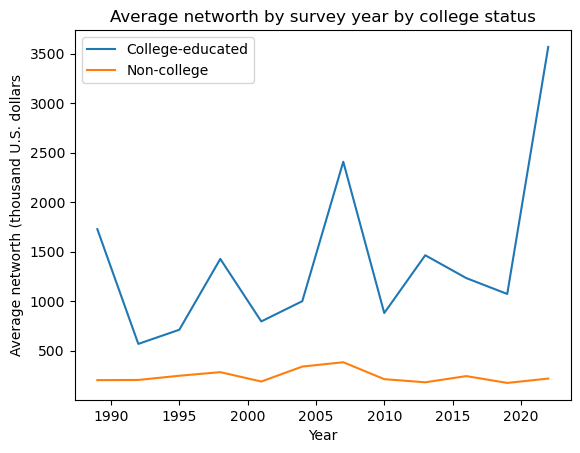

In [13]:
# Plot average networth by survey year for college-educated
plt.plot(year, avg_nw_year_c, label = 'College-educated')

# Plot average networth by survey year for non-college
plt.plot(year, avg_nw_year_nc, label = 'Non-college')

# Label x-axis
plt.xlabel('Year')
# Label y-axis
plt.ylabel('Average networth (thousand U.S. dollars')

# Add title
plt.title('Average networth by survey year by college status')
# Add legend
plt.legend()

***
# Data description

## Variables

| Variable         | Description |
|------------------|-------------|
| id               | Identifier  |
| year             | Survey year |
| age             | Age of reference person (household head) |
| educ            | Education of reference person (1 = no high school/GED, 2 = high school or GED, 3 = some college or Assoc. degree, 4 = Bachelors degree or higher)|
| networth        | Net worth in US dollars |

## Reference

- URL: https://www.federalreserve.gov/econres/scfindex.htm
- DOI Identifier: https://doi.org/10.17016/8799
- Creator: Board of Governors of the Federal Reserve Board
- Name: 2022 Survey of Consumer Finances
- Description:
    The Survey of Consumer Finances (SCF) is normally a triennial cross-sectional survey of U.S. families. The survey data include information on families' balance sheets, pensions, income, and demographic characteristics.
- Publisher: Board of Governors of the Federal Reserve System
- Publication Year: 2023 